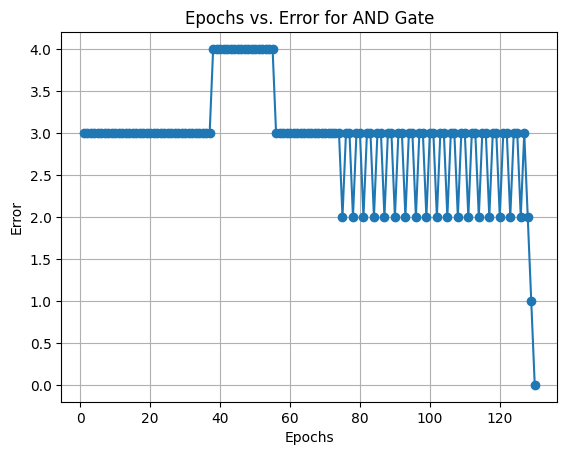

Final weights: W0 = -0.10000000000000765, W1 = 0.1000000000000001, W2 = 0.05000000000000032


In [1]:
# A1. Develop the above perceptron in your own code (don’t use the perceptron model available from 
# package). Use the initial weights as provided below. 
# W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05


import numpy as np
import matplotlib.pyplot as plt

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the input data (A, B) and targets (Z) for the AND gate
data = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

# Function to implement the step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Function to calculate the sum-square-error
def calculate_error(targets, predictions):
    return np.sum((targets - predictions) ** 2)

# Initialize variables for tracking errors
errors = []

# Training the perceptron
epochs = 0
while True:
    total_error = 0

    for sample in data:
        A, B, target = sample
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * A + W2 * B
        # Apply step activation function
        prediction = step_activation(weighted_sum)
        # Calculate the error
        error = target - prediction
        total_error += error ** 2
        # Update weights
        W0 += learning_rate * error
        W1 += learning_rate * error * A
        W2 += learning_rate * error * B

    errors.append(total_error)
    epochs += 1

    # Check for convergence (if error is 0 for all samples)
    if total_error == 0:
        break

# Plotting epochs vs. error
plt.plot(range(1, epochs + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for AND Gate')
plt.grid(True)
plt.show()

# Print the final weights
print(f"Final weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")



In [3]:

# Initialize weights and bias
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the input data (A, B) and targets (Z) for the AND gate
data = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

# Function to implement the Bi-Polar Step activation function
def bipolar_step_activation(x):
    return -1 if x < 0 else 1

# Function to implement the Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Function to implement the ReLU activation function
def relu_activation(x):
    return max(0, x)

# Function to calculate the sum-square-error
def calculate_error(targets, predictions):
    return np.sum((targets - predictions) ** 2)

# Initialize variables for tracking errors and epochs for each activation function
errors_bipolar = []
errors_sigmoid = []
errors_relu = []

epochs_bipolar = 0
epochs_sigmoid = 0
epochs_relu = 0

# Training the perceptron with Bi-Polar Step activation
while True:
    total_error = 0

    for sample in data:
        A, B, target = sample
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * A + W2 * B
        # Apply Bi-Polar Step activation function
        prediction = bipolar_step_activation(weighted_sum)
        # Calculate the error
        error = target - prediction
        total_error += error ** 2
        # Update weights
        W0 += learning_rate * error
        W1 += learning_rate * error * A
        W2 += learning_rate * error * B

    errors_bipolar.append(total_error)
    epochs_bipolar += 1

    # Check for convergence
    if total_error == 0:
        break

# Reinitialize weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Training the perceptron with Sigmoid activation
while True:
    total_error = 0

    for sample in data:
        A, B, target = sample
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * A + W2 * B
        # Apply Sigmoid activation function
        prediction = sigmoid_activation(weighted_sum)
        # Calculate the error
        error = target - prediction
        total_error += error ** 2
        # Update weights
        W0 += learning_rate * error * prediction * (1 - prediction)
        W1 += learning_rate * error * A * prediction * (1 - prediction)
        W2 += learning_rate * error * B * prediction * (1 - prediction)

    errors_sigmoid.append(total_error)
    epochs_sigmoid += 1

    # Check for convergence
    if total_error == 0:
        break

# Reinitialize weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Training the perceptron with ReLU activation
while True:
    total_error = 0

    for sample in data:
        A, B, target = sample
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * A + W2 * B
        # Apply ReLU activation function
        prediction = relu_activation(weighted_sum)
        # Calculate the error
        error = target - prediction
        total_error += error ** 2
        # Update weights
        W0 += learning_rate * error * (1 if weighted_sum >= 0 else 0)
        W1 += learning_rate * error * A * (1 if weighted_sum >= 0 else 0)
        W2 += learning_rate * error * B * (1 if weighted_sum >= 0 else 0)

    errors_relu.append(total_error)
    epochs_relu += 1

    # Check for convergence
    if total_error == 0:
        break

# Plotting epochs vs. error for each activation function
plt.plot(range(1, epochs_bipolar + 1), errors_bipolar, label='Bi-Polar Step', marker='o')
plt.plot(range(1, epochs_sigmoid + 1), errors_sigmoid, label='Sigmoid', marker='o')
plt.plot(range(1, epochs_relu + 1), errors_relu, label='ReLU', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for AND Gate with Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

# Print the number of epochs for each activation function to converge
print(f"Number of epochs for Bi-Polar Step: {epochs_bipolar}")
print(f"Number of epochs for Sigmoid: {epochs_sigmoid}")
print(f"Number of epochs for ReLU: {epochs_relu}")


KeyboardInterrupt: 